This work tries to build a model to predict whether the policyholders (customers) from the past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee[[1](https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction)].

This work using the Random forest classification.
Predictor variable :
                  
1. Gender                
1. Age                   
1. Driving_License       
1. Region_Code           
1. Previously_Insured   
1. Vehicle_Age            
1. Vehicle_Damage       
1. Annual_Premium        
1. Policy_Sales_Channel  
1. Vintage               


In [2]:
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

# Read Data

In [22]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
#Select feature column names and target variable we are going to use for training
Gender  = {'Male': 1,'Female': 0} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
train.Gender = [Gender[item] for item in train.Gender] 
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [3]:
#Select feature column names and target variable we are going to use for training
Vehicle_Age  = {'> 2 Years': 0,'1-2 Year': 1,'< 1 Year': 2} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
train.Vehicle_Age = [Vehicle_Age[item] for item in train.Vehicle_Age] 
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age Vehicle

In [4]:
#Select feature column names and target variable we are going to use for training
Vehicle_Damage  = {'Yes': 0,'No': 1} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
train.Vehicle_Damage = [Vehicle_Damage[item] for item in train.Vehicle_Damage] 
print(train)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       1   44                1         28.0                   0   
1            2       1   76                1          3.0                   0   
2            3       1   47                1         28.0                   0   
3            4       1   21                1         11.0                   1   
4            5       0   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       1   74                1         26.0                   1   
381105  381106       1   30                1         37.0                   1   
381106  381107       1   21                1         30.0                   1   
381107  381108       0   68                1         14.0                   0   
381108  381109       1   46                1         29.0                   0   

        Vehicle_Age  Vehicl

In [5]:
train.info()
train[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int64  
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int64  
 7   Vehicle_Damage        381109 non-null  int64  
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 34.9 MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,0,0,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,1,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,0,0,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,2,1,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,2,1,27496.0,152.0,39,0
5,6,0,24,1,33.0,0,2,0,2630.0,160.0,176,0
6,7,1,23,1,11.0,0,2,0,23367.0,152.0,249,0
7,8,0,56,1,28.0,0,1,0,32031.0,26.0,72,1
8,9,0,24,1,3.0,1,2,1,27619.0,152.0,28,0
9,10,0,32,1,6.0,1,2,1,28771.0,152.0,80,0


In [6]:
#Select feature column names and target variable we are going to use for training
Gender  = {'Male': 1,'Female': 0} 
  
# traversing through dataframe 
# Gender column and writing 
# values where key matches 
test.Gender = [Gender[item] for item in test.Gender] 
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

       Vehicle_Age Vehicle_

In [7]:
#Select feature column names and target variable we are going to use for training
Vehicle_Damage  = {'Yes': 1,'No':0} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
test.Vehicle_Damage = [Vehicle_Damage[item] for item in test.Vehicle_Damage] 
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

       Vehicle_Age  Vehicle

In [8]:
#Select feature column names and target variable we are going to use for training
Vehicle_Age  = {'> 2 Years': 0,'1-2 Year': 1,'< 1 Year': 2} 
  
# traversing through dataframe 
# Vehicle_Age column and writing 
# values where key matches 
test.Vehicle_Age = [Vehicle_Age[item] for item in test.Vehicle_Age] 
print(test)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0       381110       1   25                1         11.0                   1   
1       381111       1   40                1         28.0                   0   
2       381112       1   47                1         28.0                   0   
3       381113       1   24                1         27.0                   1   
4       381114       1   27                1         28.0                   1   
...        ...     ...  ...              ...          ...                 ...   
127032  508142       0   26                1         37.0                   1   
127033  508143       0   38                1         28.0                   0   
127034  508144       1   21                1         46.0                   1   
127035  508145       1   71                1         28.0                   1   
127036  508146       1   41                1         29.0                   1   

        Vehicle_Age  Vehicl

In [10]:
test.info()
test[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  int64  
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  int64  
 7   Vehicle_Damage        127037 non-null  int64  
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 10.7 MB


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,2,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,2,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,2,0,59097.0,152.0,297
5,381115,1,22,1,30.0,1,2,0,40207.0,152.0,266
6,381116,0,51,1,37.0,1,1,0,40118.0,26.0,107
7,381117,1,25,1,41.0,1,2,0,23375.0,152.0,232
8,381118,1,42,1,41.0,0,1,1,2630.0,26.0,277
9,381119,0,37,1,12.0,1,1,0,27124.0,124.0,133


In [11]:
print("Any missing sample in training set:",train.isnull().values.any())
print("Any missing sample in test set:",test.isnull().values.any(), "\n")

Any missing sample in training set: False
Any missing sample in test set: False 



In [9]:
#Frequency distribution of classes"
train_outcome = pd.crosstab(index=train["Response"],  # Make a crosstab
                              columns="count")      # Name the count column

train_outcome

<IPython.core.display.Javascript object>

col_0,count
Response,
0,334399
1,46710


# Plotting Heatmap


Heatmap can be defined as a method of graphically representing numerical data where individual data points contained in the matrix are represented using different colors. The colors in the heatmap can denote the frequency of an event, the performance of various metrics in the data set, and so on. Different color schemes are selected by varying businesses to present the data they want to be plotted on a heatmap [2].

<IPython.core.display.Javascript object>

<Axes: >

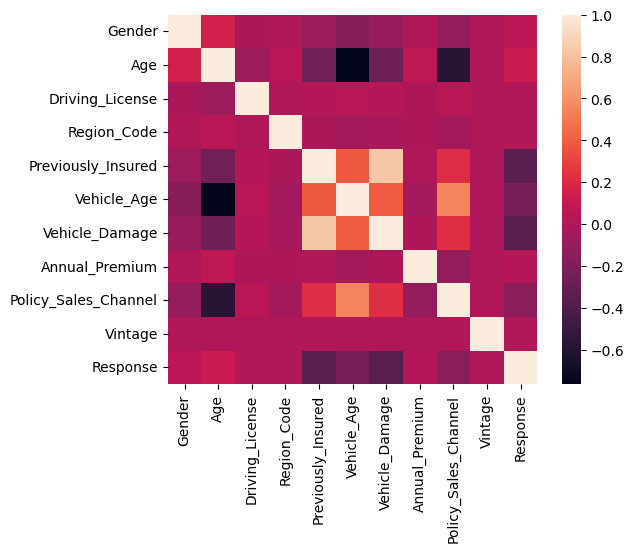

In [10]:
train = train[['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium',
'Policy_Sales_Channel','Vintage','Response']] #Subsetting the data
cor = train.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

As you can see above, we obtain the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents a high correlation.

In [11]:
#Select feature column names and target variable we are going to use for training
features=['Gender','Age','Driving_License','Region_Code','Previously_Insured','Vehicle_Age','Vehicle_Damage','Annual_Premium',
'Policy_Sales_Channel','Vintage']
target = 'Response'

In [12]:
#This is input which our classifier will use as an input.
train[features].head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,44,1,28.0,0,0,0,40454.0,26.0,217
1,1,76,1,3.0,0,1,1,33536.0,26.0,183
2,1,47,1,28.0,0,0,0,38294.0,26.0,27
3,1,21,1,11.0,1,2,1,28619.0,152.0,203
4,0,29,1,41.0,1,2,1,27496.0,152.0,39
5,0,24,1,33.0,0,2,0,2630.0,160.0,176
6,1,23,1,11.0,0,2,0,23367.0,152.0,249
7,0,56,1,28.0,0,1,0,32031.0,26.0,72
8,0,24,1,3.0,1,2,1,27619.0,152.0,28
9,0,32,1,6.0,1,2,1,28771.0,152.0,80


In [13]:
#Display first 10 target variables
train[target].head(10).values

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Random forest classification

Based on the previous classification method, random forest is a supervised learning algorithm that creates a forest randomly. This forest, is a set of decision trees, most of the times trained with the bagging method. The essential idea of bagging is to average many noisy but approximately impartial models, and therefore reduce the variation. Each tree is constructed using the following algorithm:

* Let $N$ be the number of test cases, $M$ is the number of variables in the classifier.
* Let $m$ be the number of input variables to be used to determine the decision in a given node; $m<M$.
* Choose a training set for this tree and use the rest of the test cases to estimate the error.
* For each node of the tree, randomly choose $m$ variables on which to base the decision. Calculate the best partition of the training set from the $m$ variables.

For prediction a new case is pushed down the tree. Then it is assigned the label of the terminal node where it ends. This process is iterated by all the trees in the assembly, and the label that gets the most incidents is reported as the prediction. We define the number of trees in the forest in 100. 

In [26]:
X=train[features]
y=train[target]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [29]:
from sklearn.ensemble import RandomForestClassifier

# We define the RF model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train,y_train) 



ValueError: could not convert string to float: 'Female'

In [15]:
#Make predictions using the features from the test data set
predictions = rfcla .predict(test[features])

#Display our predictions
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,2,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,1,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,1,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,2,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,2,0,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,0,26,1,37.0,1,2,0,30867.0,152.0,56
127033,508143,0,38,1,28.0,0,1,1,28700.0,122.0,165
127034,508144,1,21,1,46.0,1,2,0,29802.0,152.0,74
127035,508145,1,71,1,28.0,1,1,0,62875.0,26.0,265


In [ ]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [19]:
#Create a  DataFrame
submission = pd.DataFrame({'id':test['id'],'Response':predictions})

#Visualize the first 5 rows
submission.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [20]:
#Convert DataFrame to a csv file that can be uploaded
#This is saved in the same directory as your notebook
filename = 'submission.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

Saved file: submission.csv
